#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


## Import the Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

## Import the Data

In [57]:
eastwest_airlines_o= pd.read_excel('EastWestAirlines.xlsx', index_col=0)
eastwest_airlines_o

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [60]:
eastwest_airlines_o.rename(columns={'Award?':'award' }, inplace=True)
eastwest_airlines= eastwest_airlines_o.head()
eastwest_airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [61]:
eastwest_airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [22]:
eastwest_airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:>

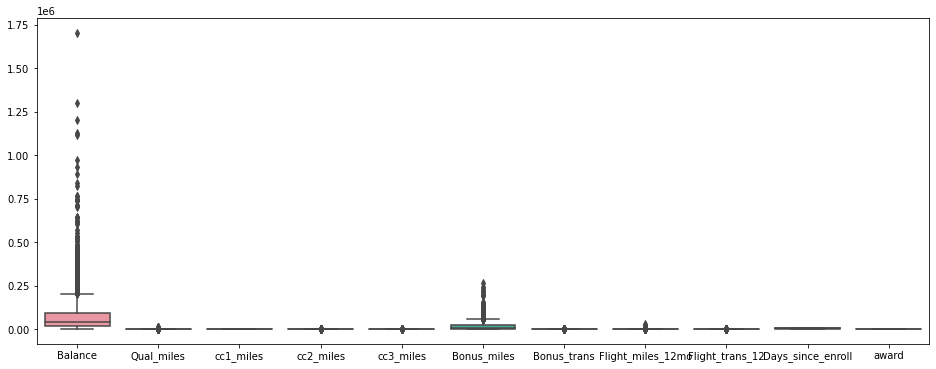

In [26]:
plt.figure(figsize=(16,6))
sns.boxplot( data=eastwest_airlines)

In [27]:
#There are major outliers in the case of balance and bonus_miles. 
#However, we cannot remove those outliers since the data may actually be true depending on the person travelling.

## Feature Analysis

All features in the dataset can be used in model building. All values are numerical and no additional dummy variable creation is required. All values represent very specific characteristics of each person flying and this in turn would be great for clusting.

## Standardizing the Data

In [30]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scaled_data= scalar.fit_transform(eastwest_airlines.iloc[:, 0:])

## K Means Clustering

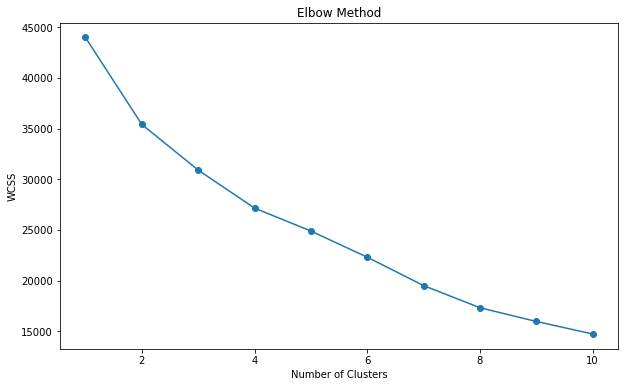

In [39]:
 wcss=[]

for i in range (1,11):
    kmeans= KMeans(n_clusters=i, random_state=12)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Number of clusters(optimum) = 5

In [43]:
#Building Kmeans CLusterig Algorithm

cluster_kmeans= KMeans(n_clusters=5, random_state=5)
cluster_kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=5)

In [44]:
cluster_kmeans.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [45]:
#Assigning clusters to the datset
#Assign clusters to the data set

eastwest_airlines['clusters_kmeans']= cluster_kmeans.labels_

In [46]:
eastwest_airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_kmeans
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
4018,64385,0,1,1,1,981,5,0,0,1395,1,3
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


In [47]:
eastwest_airlines['clusters_kmeans'].value_counts()

1    2091
0     904
3     827
4     134
2      43
Name: clusters_kmeans, dtype: int64

In [48]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

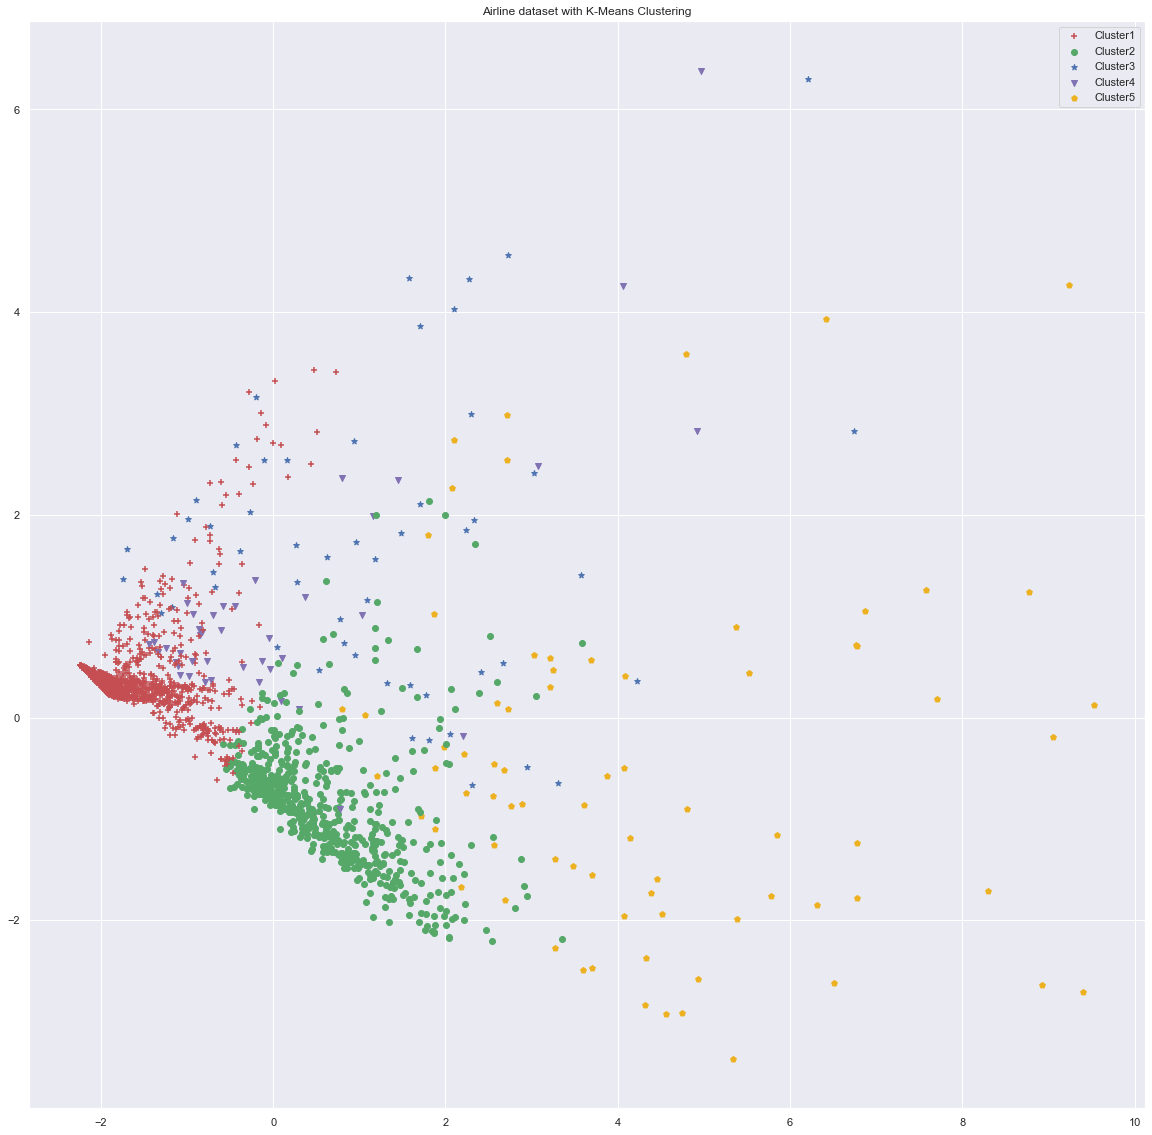

In [49]:
import pylab as pl

sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with K-Means Clustering')
pl.show()

## Heirarchial Agglomerative Clustering

## Normalize the Data

In [31]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [34]:
array= eastwest_airlines.iloc[:,0:]

norm_scaler= MinMaxScaler(feature_range=(0,1))
norm_scaled= norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(norm_scaled[:5])

[[1.65e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.60e-04 1.16e-02 0.00e+00
  0.00e+00 8.44e-01 0.00e+00]
 [1.13e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.15e-04 2.33e-02 0.00e+00
  0.00e+00 8.40e-01 0.00e+00]
 [2.43e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.56e-02 4.65e-02 0.00e+00
  0.00e+00 8.48e-01 0.00e+00]
 [8.67e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.90e-03 1.16e-02 0.00e+00
  0.00e+00 8.38e-01 0.00e+00]
 [5.73e-02 0.00e+00 7.50e-01 0.00e+00 0.00e+00 1.64e-01 3.02e-01 6.74e-02
  7.55e-02 8.36e-01 1.00e+00]]


###### Making Dendrogram

In [50]:
import scipy.cluster.hierarchy as sch

In [52]:
#dendrogram= sch.dendrogram(sch.linkage(norm_scaled, method='single'))
#dentogram linkage takes too much time to process. Not adivasable

## Building Agglomerative Clustering

In [53]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'complete')

In [54]:
y_hc= hc.fit_predict(norm_scaled)

In [55]:
# Get Clusters Label
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [67]:
eastwest_airlines_o['cluster_agg']= y_hc
eastwest_airlines_o

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,cluster_agg
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [72]:
eastwest_airlines_o['cluster_agg'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: cluster_agg, dtype: int64

In [74]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(norm_scaled)
pca_2d_agg = pca_agg.transform(norm_scaled)

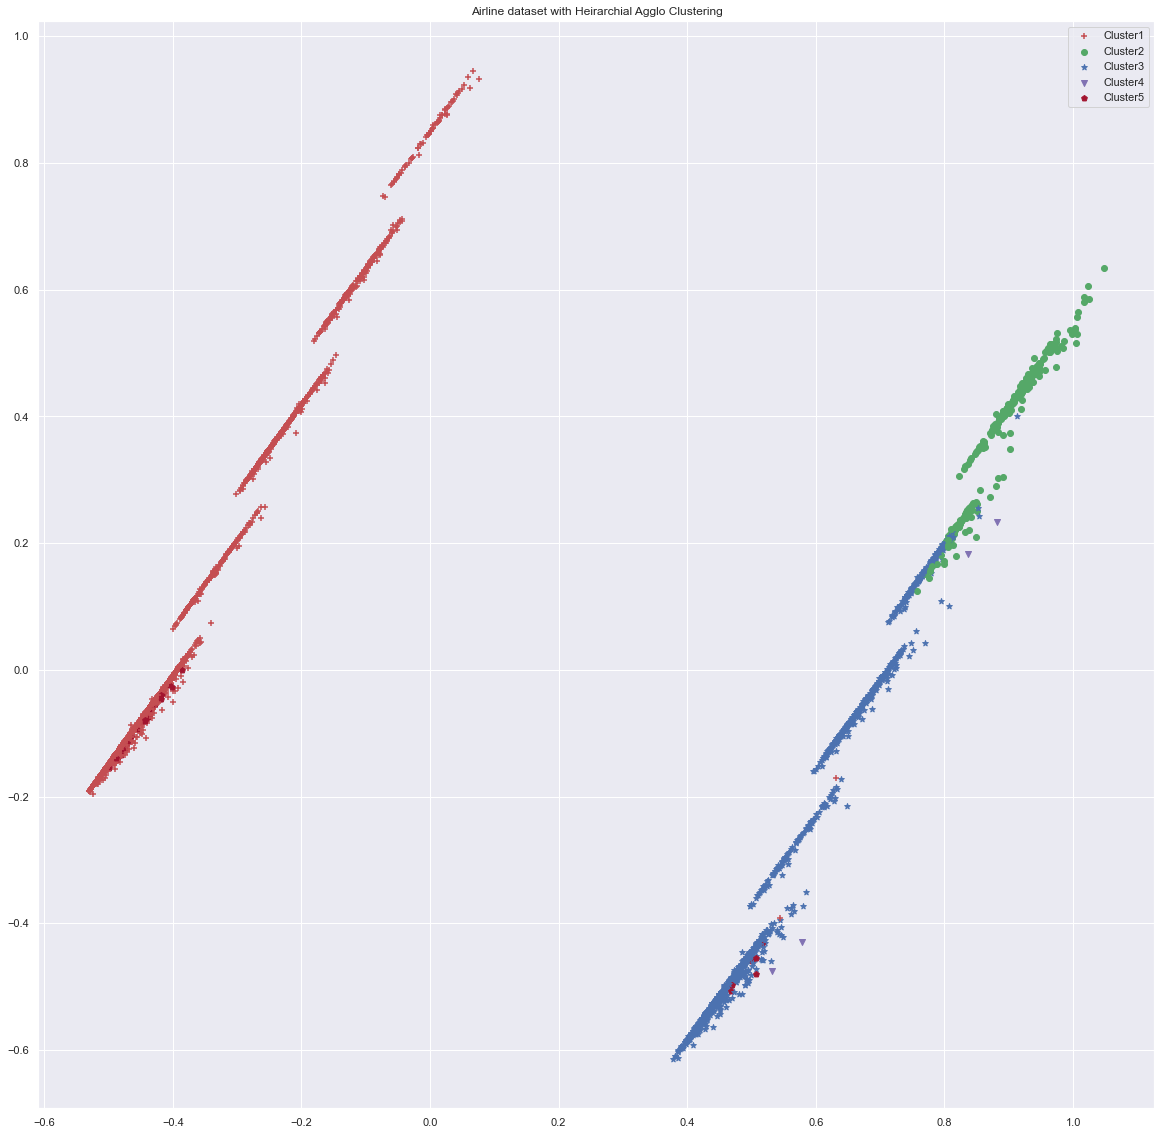

In [75]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif y_hc[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='#A2142F', marker='p')
  
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with Heirarchial Agglo Clustering')
pl.show()

## DBSCAN Clustering

Fixing the Hyperparameters

Epsilon value is taken to be 1

Min pts is 8 since there is high density

#### DBSCAN Model Building

In [79]:
dbscan= DBSCAN(eps=1,min_samples=8,metric='euclidean')
dbscan.fit(scaled_data)

DBSCAN(eps=1, min_samples=8)

In [80]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
eastwest_airlines_dbscan= eastwest_airlines_o.drop('cluster_agg', axis=1)
eastwest_airlines_dbscan

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [85]:
eastwest_airlines_dbscan['cluster_DBSCAN']= dbscan.labels_
eastwest_airlines_dbscan

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,cluster_DBSCAN
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [86]:
eastwest_airlines_dbscan['cluster_DBSCAN'].value_counts()

 0    2293
 1    1055
-1     640
 2      11
Name: cluster_DBSCAN, dtype: int64

In [87]:
#Visualising the data via dimensionality reduction

pca_db = PCA(n_components=2).fit(scaled_data)
pca_2d_db = pca_db.transform(scaled_data)

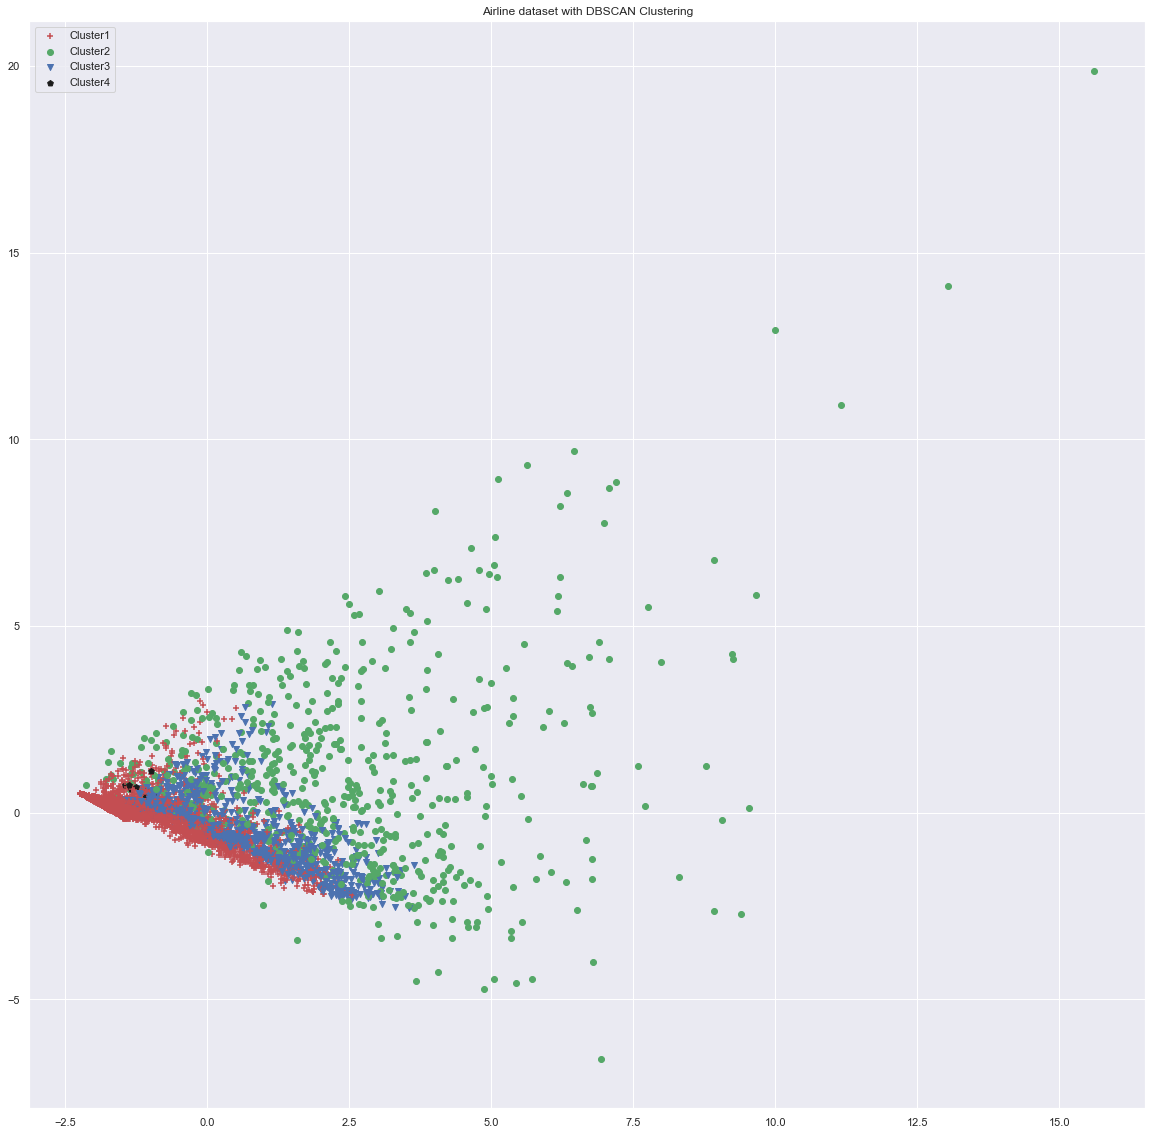

In [88]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_2d_db.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
    elif dbscan.labels_[i] == 2:
        c4 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='k', marker='p')
        
pl.legend([c1, c2, c3,c4], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
pl.title('Airline dataset with DBSCAN Clustering')
pl.show()

Conclusion

DBScan shows the best model in the three cases since it is density based. It also shows various outlier noise points which require additional attention for the airline's schemes.

Heirarchial clustering took the largest processing time. It's output is not very apt.

Similar scenario is observed in the case of k-means clustering since the datapoints are very dense.

## ======================================================================================================================